In [1]:
import numpy as np
#import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = mnist.load_data()
train_x = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255

autoencoder = Sequential()
autoencoder.add(Dense(512,  activation='elu', input_shape=(784,)))
autoencoder.add(Dense(128,  activation='elu'))
autoencoder.add(Dense(10,    activation='linear', name="bottleneck"))
autoencoder.add(Dense(128,  activation='elu'))
autoencoder.add(Dense(512,  activation='elu'))
autoencoder.add(Dense(784,  activation='sigmoid'))
autoencoder.compile(loss='mean_squared_error', optimizer = Adam())
trained_model = autoencoder.fit(train_x, train_x, batch_size=1024, epochs=50, verbose=1, validation_data=(val_x, val_x))
encoder = Model(autoencoder.input, autoencoder.get_layer('bottleneck').output)
encoded_data = encoder.predict(train_x)  # bottleneck representation
decoded_output = autoencoder.predict(train_x)        # reconstruction
encoding_dim = 10

# return the decoder
encoded_input = Input(shape=(encoding_dim,))
decoder = autoencoder.layers[-3](encoded_input)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoder = Model(encoded_input, decoder)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50


2023-03-03 10:29:11.122094: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3402225000 Hz
2023-03-03 10:29:11.122664: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55e778d6a170 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-03-03 10:29:11.122680: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


60000/60000 [==============================] - 3s 48us/sample - loss: 0.0752 - val_loss: 0.0491
Epoch 2/50
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0426 - val_loss: 0.0364
Epoch 3/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0333 - val_loss: 0.0296
Epoch 4/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0281 - val_loss: 0.0259
Epoch 5/50
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0254 - val_loss: 0.0240
Epoch 6/50
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0236 - val_loss: 0.0223
Epoch 7/50
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0222 - val_loss: 0.0214
Epoch 8/50
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0212 - val_loss: 0.0204
Epoch 9/50
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0204 - val_loss: 0.0198
Epoch 10/50
60000/60000 [=======================

In [38]:
IMG=x_test[181]
IMG.shape
import numpy as np
IMG=IMG+np.random.randint(0,50,size=(28,28))

In [41]:
%matplotlib inline
from tensorflow.keras.preprocessing import image
# if the img.png is not one of the MNIST dataset that the model was trained on, the error will be very high.
img = image.load_img("../../datasets/cat.jpg", target_size=(28, 28), color_mode = "grayscale")
#img = IMG
input_img = image.img_to_array(img)/255
#input_img=train_x[119]
#input_img=val_x[181]
inputs = input_img.reshape(1,784)
target_data = autoencoder.predict(inputs)
dist = np.linalg.norm(inputs - target_data, axis=-1)
print(dist)

[17.723295]


In [20]:
!pwd

/home/ishanu/ZED/Research/course_notes/notebooks/vae


In [14]:
input_img.shape

(784,)

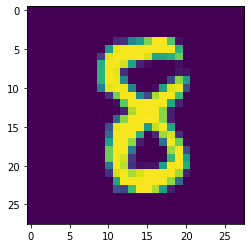

In [23]:
import pylab as plt
plt.imshow(x_test[181])
#import seaborn as sns
#sns.heatmap(input_img)
#plt.imshow(img)